# Dataset Zoo
Cascade by itself is **DIY ML-engineering solution**. This means that it provides certain basics on top of which you can easily build own ML-workflow.  
  
Cascade has plenty of solutions - basic that are added to the core and more specific that are in the special `utils` module. And if you didn't found suitable component, you can write it yourself.  
  
Here some of already-made components are presented. These are the `Dataset`s - building blocks of Cascade's pipelines, their description and short examples of how to use them in your workflow.

In [1]:
import cascade
print(cascade.__version__)

0.8.0


## Wrappers
[Wrapper documentation](../cascade.data.html#cascade.data.Wrapper)  
  
If your solution has some data source that is already accesible in python-code, but you need to plug it in Cascade's workflow it may be all you need. `Wrapper` gives the items from the source one by one, adding some info about the undelying data to its metadata.

In [2]:
from cascade import data as cdd


ds = cdd.Wrapper([0, 1, 2, 3, 4]) # Here for simplicity the list of numbers is a data source

for item in ds:
    print(item, end=' ')

0 1 2 3 4 

In [3]:
ds.get_meta()

[{'name': '<cascade.data.dataset.Wrapper',
  'type': 'dataset',
  'len': 5,
  'obj_type': "<class 'list'>"}]

## Iterators
[Iterator documentation](../cascade.data.html#cascade.data.Iterator)  
  
If data source doesn't have length - you cannot use `Wrapper`s, but it is not a problem, you can use `Iterator`s instead! It is basically the same dataset, but using different interface.

In [4]:
from cascade import data as cdd


def gen():
    for number in range(5):
        yield number

ds = cdd.Iterator(gen())

for item in ds:
    print(item, end=' ')

0 1 2 3 4 

## ApplyModifier
[ApplyModifier documentation](../cascade.data.html#cascade.data.ApplyModifier)  
  
The pipelines are frequently applying some python-functions to the items in datasets. In Cascade this is done by using `ApplyModifier`.

In [5]:
from cascade import data as cdd


# The function that will be applied
def square(x):
    return x ** 2

ds = cdd.Wrapper([0, 1, 2, 3, 4])
ds = cdd.ApplyModifier(ds, square) # ds now a pipeline of two stages

for item in ds:
    print(item, end=' ')

0 1 4 9 16 

## Concatenator
[Concatenator documentation](../cascade.data.html#cascade.data.Concatenator)  
  
Concatenation is also frequent operation that is done to unify several datasets into one. In Cascade it is done easily using `Concatenator`.

In [6]:
from cascade import data as cdd


ds_1 = cdd.Wrapper([0, 1, 2, 3, 4])
ds_2 = cdd.Wrapper([5, 6, 7, 8, 9])

ds = cdd.Concatenator((ds_1, ds_2))

for item in ds:
    print(item, end=' ')

0 1 2 3 4 5 6 7 8 9 

In addition, it also stores metadata of all its datasets.

In [7]:
ds.get_meta()

[{'name': '<cascade.data.concatenator.Concatenator of\n<cascade.data.dataset.Wrapper\n<cascade.data.dataset.Wrapper',
  'type': 'dataset',
  'data': [[{'name': '<cascade.data.dataset.Wrapper',
     'type': 'dataset',
     'len': 5,
     'obj_type': "<class 'list'>"}],
   [{'name': '<cascade.data.dataset.Wrapper',
     'type': 'dataset',
     'len': 5,
     'obj_type': "<class 'list'>"}]]}]

## split
[split documentation](../cascade.data.html#cascade.data.split)  
  
This is the opposite of concatenate - we can split one dataset into train and test parts easily with `cdd.split()`

In [5]:
from cascade import data as cdd


ds = cdd.Wrapper([0, 1, 2, 3, 4, 5, 6, 7])
train_ds, test_ds = cdd.split(ds, 0.8)

for item in train_ds:
    print(item, end=' ')
print()
for item in test_ds:
    print(item, end=' ')

0, 1, 2, 3, 4, 5, 
6, 7, 

Basically, this function creates two RangeSampler dividing input dataset into two parts.

In [3]:
train_ds.get_meta()

[{'name': '<cascade.data.range_sampler.RangeSampler',
  'type': 'dataset',
  'len': 6},
 {'name': '<cascade.data.dataset.Wrapper',
  'type': 'dataset',
  'len': 8,
  'obj_type': "<class 'list'>"}]

## Composer
[Composer documentation](../cascade.data.html#cascade.data.Composer)  

Composer is another way of unifying two datasets, but in this case the union dataset returns tuples of item from composed datasets. This is useful, when items and labels for classification are from different datasets.

In [1]:
from cascade import data as cdd


items = cdd.Wrapper(['A', 'B', 'C', 'D'])
labels = cdd.Wrapper([0, 1, 0, 1])

ds = cdd.Composer((items, labels))

[item for item in ds]

[('A', 0), ('B', 1), ('C', 0), ('D', 1)]

## CyclicSampler
[CyclicSampler documentation](../cascade.data.html#cascade.data.CyclicSampler)  
  
When you need an easy way to repeat your dataset several times or the opposite - restrict the number of items in dataset, you can use this.

In [8]:
from cascade import data as cdd


ds = cdd.Wrapper([0, 1, 2, 3, 4])
ds = cdd.CyclicSampler(ds, 11)

for item in ds:
    print(item, end=' ')

0 1 2 3 4 0 1 2 3 4 0 

## RandomSampler
[RandomSampler documentation](../cascade.data.html#cascade.data.RandomSampler)  
  
Undeterministic counterpart of CyclicSampler. Ideal solution for shuffling the data in lazy way.

In [58]:
from cascade import data as cdd
import numpy as np
np.random.seed(0)


ds = cdd.Wrapper([0, 1, 2, 3, 4])
ds = cdd.RandomSampler(ds, 11)

for item in ds:
    print(item, end=' ')

4 0 3 3 3 1 3 2 4 0 0 

With no arguments - shuffles the dataset.

In [59]:
ds = cdd.Wrapper([0, 1, 2, 3, 4])
ds = cdd.RandomSampler(ds)

for item in ds:
    print(item, end=' ')

3 0 1 2 4 

## RangeSampler
[RangeSampler documentation](../cascade.data.html#cascade.data.RangeSampler)  
  
This is if you need python's range in Cascade realm. Has just similar interface as `range`.

In [10]:
from cascade import data as cdd


ds = cdd.Wrapper([0, 1, 2, 3, 4 , 5, 6, 7, 8, 9, 10])
ds = cdd.RangeSampler(ds, 1, 10, 2)

for item in ds:
    print(item, end=' ')

1 3 5 7 9 

## BruteforceCacher
[BruteforceCacher documentation](../cascade.data.html#cascade.data.BruteforceCacher)  
  
Modifiers are lazy and not storing all data in memory. This is important when datasets are big and do not fit into memory, but can slow down some processes. If your data fits into memory, you can cache previous stages of pipeline to speed up next stages.  
  
Suppose for example that we need to obtain our data through very slow network

In [61]:
import time


class LongLoadingDataSource(cdd.Dataset):
    def __init__(self, length, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._length = length

    def __getitem__(self, index):
        time.sleep(1)
        return index
    
    def __len__(self):
        return self._length

ds = LongLoadingDataSource(10)
ds = cdd.BruteforceCacher(ds)

100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


Now we waited all loading process and cached everything. Since that all data is in memory and the loading is no problem.
But what if we have a script that should be executed every time and then caching has no sense?

## Pickler
[Pickler documentation](../cascade.data.html#cascade.data.Pickler)  
  

For these purposes `Pickler` was implemented. You can cache and then pickle previous pipeline on the disk, then load it and use without problems. 

In [62]:
ds = LongLoadingDataSource(10)
ds = cdd.BruteforceCacher(ds)
ds = cdd.Pickler('ds.pkl', ds)

100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


In [63]:
from tqdm import tqdm

ds = cdd.Pickler('ds.pkl')

for item in tqdm(ds):
    print(item, end=' ')

100%|██████████| 10/10 [00:00<00:00, 8336.92it/s]

0 1 2 3 4 5 6 7 8 9 

Note that after unpickling we don't need to wait for loading again.

## SequentialCacher
[SequentialCacher documentation](../cascade.data.html#cascade.data.SequentialCacher)  
  
Some data is accessed sequentially and can be cached in advance by batches.

In [64]:
from cascade import data as cdd


class AlertOnLoad(cdd.Dataset):
    # This dataset prints the value every time it is accessed
    def __init__(self, length, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._length = length

    def __getitem__(self, index):
        print(f'loaded {index}')
        return index
    
    def __len__(self):
        return self._length


ds = AlertOnLoad(100)
ds = cdd.SequentialCacher(ds, 10)

for i in range(11):
    print(f'Step {i}')
    ds[i] # Load the element

Step 0
loaded 0
loaded 1
loaded 2
loaded 3
loaded 4
loaded 5
loaded 6
loaded 7
loaded 8
loaded 9
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
loaded 10
loaded 11
loaded 12
loaded 13
loaded 14
loaded 15
loaded 16
loaded 17
loaded 18
loaded 19


## VersionAssigner
[VersionAssigner documentation](../cascade.data.html#cascade.data.VersionAssigner)  
  
Dataset versioning is the way to compress whole information about a pipeline into human-readable form of semantically significant numbers separated by a dot.  
The principle is basically the same as in SemVer - the version structure is `MAJOR.MINOR`. The first component changes when the change is in the pipeline composition i.e. some modifiers added/deleted. The second changes when any field of meta data changes.  
VersionAssigner tracks versions using special log file, which can be used by the user to determine which kind of dataset corresponds to which version.

In [2]:
from cascade import data as cdd


ds = cdd.Wrapper([0, 1, 2, 3, 4])
ds = cdd.VersionAssigner(ds, 'data_log.yml', verbose=True)

Dataset version: 0.0


In [3]:
# Change its structure - add new modifier
ds = cdd.Wrapper([0, 1, 2, 3, 4])
ds = cdd.RangeSampler(ds, 0, len(ds), 2)
ds = cdd.VersionAssigner(ds, 'data_log.yml', verbose=True)


Dataset version: 1.0


In [5]:
# Revert changes - version downgrades back using records
# in the data_log
ds = cdd.Wrapper([0, 1, 2, 3, 4])
ds = cdd.VersionAssigner(ds, 'data_log.yml', verbose=True)


Dataset version: 0.0


In [6]:
# Update input data - minor update
ds = cdd.Wrapper([0, 1, 2, 3, 4, 5])
ds = cdd.VersionAssigner(ds, 'data_log.yml', verbose=True)

Dataset version: 0.1


## OverSampler and UnderSampler
[OverSampler documentation](../cascade.utils.html#cascade.utils.OverSampler)  
[UnderSampler documentation](../cascade.utils.html#cascade.utils.UnderSampler)  
  
These sampling strategies placed into utils module because they make quite big assumtions about datasets - that they emit tuples and the second element of each tuple is a classification label. 
   
Using that labels they equalize label distribution by repeating or deleting some elements. The sampler themselves are lazy, but to obtain label distribution, they load elements one-by-one not storing them in memory in initialization.  
  
They are also deterministic and place elements with similar labels together. Consider using `RandomSampler` to shuffle datasets before passing them to learning.

In [6]:
from cascade import utils as cdu
from cascade import data as cdd


ds = cdd.Wrapper([
    ('a', 0),
    ('b', 1),
    ('c', 1),
    ('d', 2),
])

ds = cdu.OverSampler(ds)
[item for item in ds]

100%|██████████| 4/4 [00:00<00:00, 1971.93it/s]

Original length was 4 and new is 6


[('a', 0), ('b', 1), ('c', 1), ('d', 2), ('a', 0), ('d', 2)]

In [7]:
ds = cdd.Wrapper([
    ('a', 0),
    ('b', 1),
    ('c', 1),
    ('d', 2),
])

ds = cdu.UnderSampler(ds)
[item for item in ds]

100%|██████████| 4/4 [00:00<00:00, 3474.98it/s]

Original length was 4 and new is 3


[('a', 0), ('b', 1), ('d', 2)]

## WeighedSampler
[WeighedSampler documentation](../cascade.utils.html#cascade.utils.WeighedSampler)  

If you need more freedom in how to sample your data according to the label you have, you can use this

In [2]:
from cascade import utils as cdu
from cascade import data as cdd

ds = cdd.Wrapper([
    ('A', 0),
    ('B', 0),
    ('C', 1),
    ('D', 2),
])

ds = cdu.WeighedSampler(ds, partitioning={
    0: 4,
    1: 2
})

[item for item in ds]

100%|██████████| 4/4 [00:00<?, ?it/s]

Original length was 4 and new is 7


[('A', 0), ('B', 0), ('A', 0), ('B', 0), ('C', 1), ('C', 1), ('D', 2)]

## Specific datasets
  
Some data types require specific functionality from its dataset wrapper. Some wrappers are already implemented and contain a number of useful tools and features.

### TimeSeriesDataset
[TimeSeriesDataset documentation](../cascade.utils.html#cascade.utils.TimeSeriesDataset)  

One `TimeSeriesDataset` contains whole time series data. They require separate time and data channels to initialize.

In [9]:
import datetime
from cascade import utils as cdu


ds = cdu.TimeSeriesDataset(time=[
    datetime.datetime(2022, 11, 5),
    datetime.datetime(2022, 11, 6),
    datetime.datetime(2022, 11, 7),
], data=[0, 1, 2])

ds.to_pandas()

,0
2022-11-05,0
2022-11-06,1
2022-11-07,2


The important thing about these datasets is that they *always should be initialized with keywords*. The usage of `time` and `data` is mandatory for dataset to work. The same applies to other specific datasets such as TableDataset and its keyword `t` for table.

In [12]:
ds = cdu.TimeSeriesDataset([
    datetime.datetime(2022, 11, 5),
    datetime.datetime(2022, 11, 6),
    datetime.datetime(2022, 11, 7),
], [0, 1, 2])

ds.to_pandas()

,0


This is due to unification of two interfaces in `Modifier`s for these datasets. A `Modifier` should be also `TimeSeriesDataset`. 
   
Let's initialize ds again:

In [29]:
ds = cdu.TimeSeriesDataset(time=[
    datetime.datetime(2022, 11, 5),
    datetime.datetime(2022, 11, 6),
    datetime.datetime(2022, 11, 7),
    datetime.datetime(2022, 11, 8),
], data=[1, 0, 2, 5])

You can use several convenience access methods such as any type of indexing: using integers or dates.

In [30]:
ds[2]

2

In [31]:
ds[datetime.datetime(2022, 11, 7)]

2

The slices are also available.

In [32]:
ds[1:].to_pandas() # Using integers

,0
2022-11-06,0
2022-11-07,2
2022-11-08,5


In [33]:
ds[datetime.datetime(2022, 11, 6):].to_pandas() # Or using time

,0
2022-11-06,0
2022-11-07,2
2022-11-08,5


Note that every slice returns new `TimeSerisDataset` instance.

There is always a general way to extract all data, which is most useful for plotting data.

In [34]:
ds.get_data()

(array([datetime.datetime(2022, 11, 5, 0, 0),
        datetime.datetime(2022, 11, 6, 0, 0),
        datetime.datetime(2022, 11, 7, 0, 0),
        datetime.datetime(2022, 11, 8, 0, 0)], dtype=object),
 array([1, 0, 2, 5]))

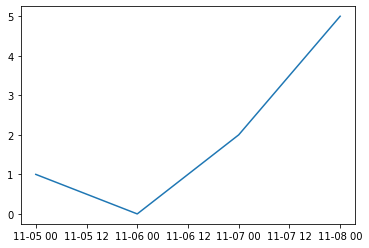

In [35]:
from matplotlib import pyplot as plt

plt.plot(*ds.get_data())

You can always get the data alone using `to_numpy()`

In [36]:
ds.to_numpy()

array([1, 0, 2, 5])

Interpolation in case of any missing data is crucial when working with real-life time series. Here it is implemented in `Modifier`.  
  
First - dataset is initialized with nan-value. Nan-value is `numpy.nan` because Interpolate uses pandas under-the-hood.

In [26]:
import numpy as np

ds = cdu.TimeSeriesDataset(time=[
    datetime.datetime(2022, 11, 5),
    datetime.datetime(2022, 11, 6),
    datetime.datetime(2022, 11, 7),
], data=[0, np.nan, 2])

ds.to_pandas()

,0
2022-11-05,0.0
2022-11-06,NaN
2022-11-07,2.0


In [19]:
cdu.Interpolate(ds, method='linear', limit_direction='both').to_pandas() # These arguments are defaults

,0
2022-11-05,0
2022-11-06,1
2022-11-07,2


Averaging over some time-window is also a frequent task in work with time-series. Here in `Average` you can set the time grain and a quantity to average.

In [20]:
import pendulum


ds = cdu.TimeSeriesDataset(time=[
    pendulum.datetime(2022, 11, 5),
    pendulum.datetime(2022, 11, 6),
    pendulum.datetime(2022, 11, 7),
    pendulum.datetime(2022, 11, 8),
], data=[0, 1, 2, 3])

In [21]:
cdu.Average(ds, unit='days', amount=2).to_pandas()

,0
2022-11-05 00:00:00+00:00,0.5
2022-11-07 00:00:00+00:00,2.5


In [22]:
cdu.Align(ds, [pendulum.datetime(2022, 11, 8)]).to_pandas()

,0
2022-11-08 00:00:00+00:00,3.0


## TableDataset
[TableDataset documentation](../cascade.utils.html#cascade.utils.TableDataset)  

  
Frequently the work with tables is done. To track them efficiently using Cascade this wrapper was created.

In [51]:
import pandas as pd

ds = cdu.TableDataset(t=pd.DataFrame(data=[[2, 0], [1, 0], [1, 0]]))
ds

<cascade.utils.table_dataset.TableDataset
    0  1
0  2  0
1  1  0
2  1  0

The most important thing here is the extensive metadata that this wrapper holds.

In [52]:
ds.get_meta()

[{'name': '<cascade.utils.table_dataset.TableDataset\n    0  1\n0  2  0\n1  1  0\n2  1  0',
  'type': 'dataset',
  'columns': [0, 1],
  'len': 3,
  'info': {0: {'count': 3.0,
    'mean': 1.3333333333333333,
    'std': 0.5773502691896257,
    'min': 1.0,
    '25%': 1.0,
    '50%': 1.0,
    '75%': 1.5,
    'max': 2.0},
   1: {'count': 3.0,
    'mean': 0.0,
    'std': 0.0,
    'min': 0.0,
    '25%': 0.0,
    '50%': 0.0,
    '75%': 0.0,
    'max': 0.0}}}]

Filtering is common when using tables. This modifier accepts binary mask and records new stage in the pipeline's metadata.

In [53]:
ds = cdu.TableFilter(ds, ds._table[0] == 1)

Length before filtering: 3, length after: 2


In [54]:
ds.get_meta()

[{'name': '<cascade.utils.table_dataset.TableFilter\n    0  1\n1  1  0\n2  1  0',
  'type': 'dataset',
  'len': 2,
  'columns': [0, 1],
  'info': {0: {'count': 2.0,
    'mean': 1.0,
    'std': 0.0,
    'min': 1.0,
    '25%': 1.0,
    '50%': 1.0,
    '75%': 1.0,
    'max': 1.0},
   1: {'count': 2.0,
    'mean': 0.0,
    'std': 0.0,
    'min': 0.0,
    '25%': 0.0,
    '50%': 0.0,
    '75%': 0.0,
    'max': 0.0}}},
 {'name': '<cascade.utils.table_dataset.TableDataset\n    0  1\n0  2  0\n1  1  0\n2  1  0',
  'type': 'dataset',
  'columns': [0, 1],
  'len': 3,
  'info': {0: {'count': 3.0,
    'mean': 1.3333333333333333,
    'std': 0.5773502691896257,
    'min': 1.0,
    '25%': 1.0,
    '50%': 1.0,
    '75%': 1.5,
    'max': 2.0},
   1: {'count': 3.0,
    'mean': 0.0,
    'std': 0.0,
    'min': 0.0,
    '25%': 0.0,
    '50%': 0.0,
    '75%': 0.0,
    'max': 0.0}}}]

## More to come
Cascade is rapidly developing and shaped to the needs of its users, so there are more new tools to come!